In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix ,accuracy_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.metrics import roc_curve, auc

## Metrics Function


In [223]:
def num_met(X_test , y_test , y_pred , mod):
    print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}")
    print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")
    print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    plot_confusion_matrix(mod, X_test, y_test)
    plt.show()
def roccurve(X_test , y_test, mod):
    class_probabilities = mod.predict_proba(X_test)
    preds = class_probabilities[:, 1]

    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # Printing AUC
    print(f"AUC for our classifier is: {roc_auc}")

    # Plotting the ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [153]:
import sklearn.datasets as dts

In [154]:
df = dts.load_breast_cancer

In [155]:
df = df(as_frame=True)

In [156]:
X , y = df['data'] , df['target']

In [157]:
y = pd.DataFrame(y)

In [159]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [158]:
mean = X.describe().loc['mean']
std = X.describe().loc['std']

In [160]:
for cols in X.columns:
    X[cols]= (X[cols] - mean[cols])/std[cols]

/home/cselab6-12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [163]:
X = X.values
y = y.values

In [166]:
y = y.reshape(569 , )

In [67]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

## Logistic Regression Model

In [224]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1.5 , penalty= 'l2' , solver = 'saga' , max_iter = 100000)
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
lr.score(X_test , y_test)

0.9912280701754386

## Logistic Regression Metrics

Accuracy of the classifier is: 0.9912280701754386
Precision Score of the classifier is: 0.9863013698630136
Recall Score of the classifier is: 1.0
F1 Score of the classifier is: 0.993103448275862
[[41  1]
 [ 0 72]]


/home/cselab6-12/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


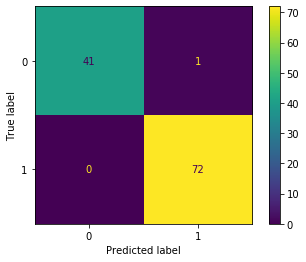

In [225]:
num_met(X_test , y_test , y_pred , lr)

AUC for our classifier is: 0.9940476190476191


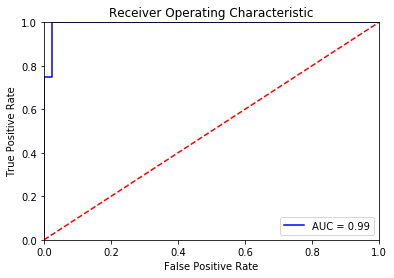

In [227]:
roccurve(X_test, y_test , lr)

## Decision Tree Model

In [188]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy' , max_features = "sqrt" , min_samples_split= 2)

In [189]:
dtc.fit(X_train , y_train)
dtc.score(X_test , y_test)

0.9649122807017544

In [228]:
y_pred = dtc.predict(X_test)

## Decision Tree Metrics

Accuracy of the classifier is: 0.9649122807017544
Precision Score of the classifier is: 0.9594594594594594
Recall Score of the classifier is: 0.9861111111111112
F1 Score of the classifier is: 0.9726027397260274
[[39  3]
 [ 1 71]]


/home/cselab6-12/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


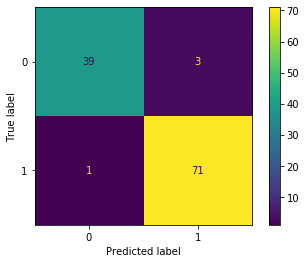

In [229]:
num_met(X_test , y_test , y_pred , dtc)

AUC for our classifier is: 0.9573412698412699


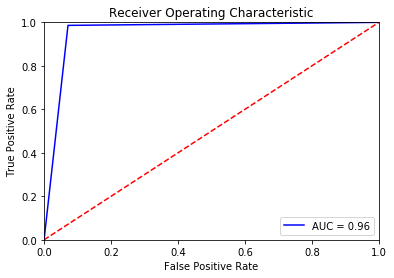

In [230]:
roccurve(X_test, y_test , dtc)

## GradientBoosting Classifier

In [237]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate= 0.1 , validation_fraction=0.3)

In [238]:
gbc.fit(X_train , y_train)
gbc.score(X_test , y_test)

0.9736842105263158

In [239]:
y_pred = gbc.predict(X_test)

## GradientBoosting Metrics

Accuracy of the classifier is: 0.9736842105263158
Precision Score of the classifier is: 0.9726027397260274
Recall Score of the classifier is: 0.9861111111111112
F1 Score of the classifier is: 0.9793103448275863
[[40  2]
 [ 1 71]]


/home/cselab6-12/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


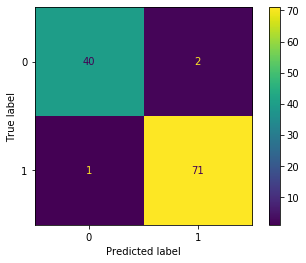

In [240]:
num_met(X_test , y_test , y_pred , gbc)

AUC for our classifier is: 0.9573412698412699


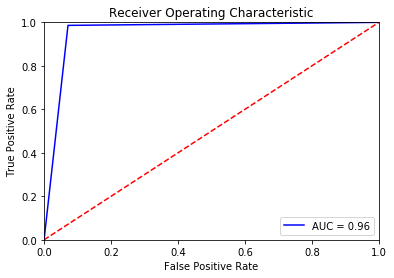

In [241]:
roccurve(X_test, y_test , dtc)

## Bagging Classifier

In [242]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()

In [243]:
bc.fit(X_train , y_train)
bc.score(X_test , y_test)

0.956140350877193

In [244]:
y_pred = bc.predict(X_test)

## BaggingClassifier Metrics

Accuracy of the classifier is: 0.956140350877193
Precision Score of the classifier is: 0.971830985915493
Recall Score of the classifier is: 0.9583333333333334
F1 Score of the classifier is: 0.965034965034965
[[40  2]
 [ 3 69]]


/home/cselab6-12/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


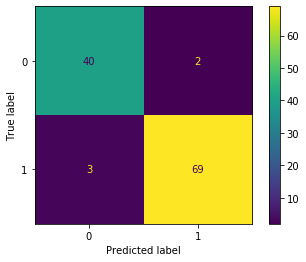

In [245]:
num_met(X_test , y_test , y_pred , bc)

AUC for our classifier is: 0.9914021164021163


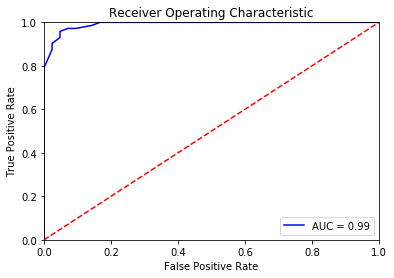

In [246]:
roccurve(X_test, y_test , bc)

## AdaBoost Classifier

In [256]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(learning_rate=0.9)

In [257]:
abc.fit(X_train , y_train)
abc.score(X_test, y_test)

0.9736842105263158

In [261]:
y_pred = abc.predict(X_test)

## AdaBoostClassifier Metrics

Accuracy of the classifier is: 0.9736842105263158
Precision Score of the classifier is: 0.9726027397260274
Recall Score of the classifier is: 0.9861111111111112
F1 Score of the classifier is: 0.9793103448275863
[[40  2]
 [ 1 71]]


/home/cselab6-12/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


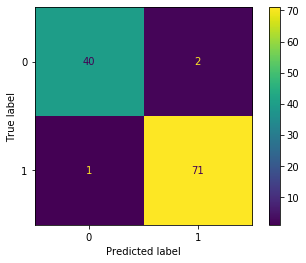

In [262]:
num_met(X_test , y_test , y_pred , abc)

AUC for our classifier is: 0.998015873015873


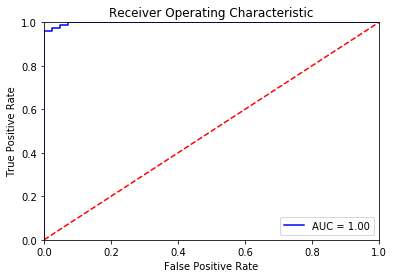

In [260]:
roccurve(X_test, y_test , abc)